# Task


1. Buat model Machine learning (Boosting and Bagging).
2. Gunakan Matriks Evaluasi (RMSE,MSE,RSquared)
3. Beri penjelasan untuk setiap persamaan matematika yang ada.

Here is all the data you need:
"Automobile (1).csv"

## Data loading

### Subtask:
Load the "Automobile (1).csv" dataset.


**Reasoning**:
Load the "Automobile (1).csv" dataset into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

try:
    df_automobile = pd.read_csv('Automobile (1).csv')
    display(df_automobile.head())
except FileNotFoundError:
    print("Error: 'Automobile (1).csv' not found. Please ensure the file exists in the current directory or provide the correct path.")
    df_automobile = None # Assign None to df_automobile to indicate failure

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2


## Data exploration

### Subtask:
Explore the dataset to understand its structure, identify missing values, and examine the distribution of variables. Determine the target variable for prediction.


**Reasoning**:
I need to perform an initial exploration of the dataset, including checking its shape, data types, descriptive statistics, and missing values. I will also identify the target variable and analyze the distribution of variables.



Shape of the DataFrame: (205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float

None

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000



Missing Values:
 price                 4
highway-mpg           0
city-mpg              0
peak-rpm              2
horsepower            2
compression-ratio     0
stroke                4
bore                  4
fuel-system           0
engine-size           0
num-of-cylinders      0
engine-type           0
curb-weight           0
height                0
width                 0
length                0
wheel-base            0
engine-location       0
drive-wheels          0
body-style            0
num-of-doors          2
aspiration            0
fuel-type             0
make                  0
normalized-losses    41
symboling             0
dtype: int64


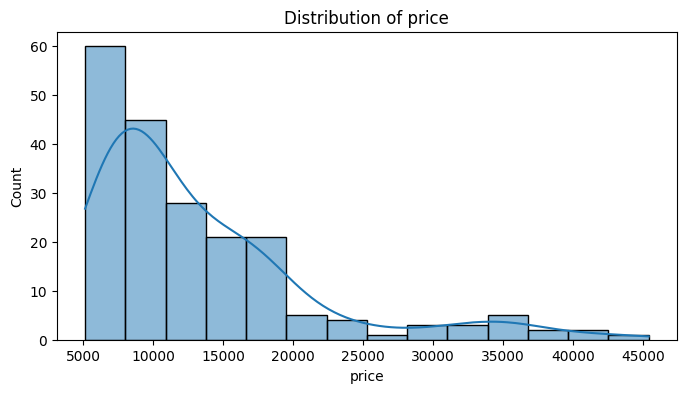

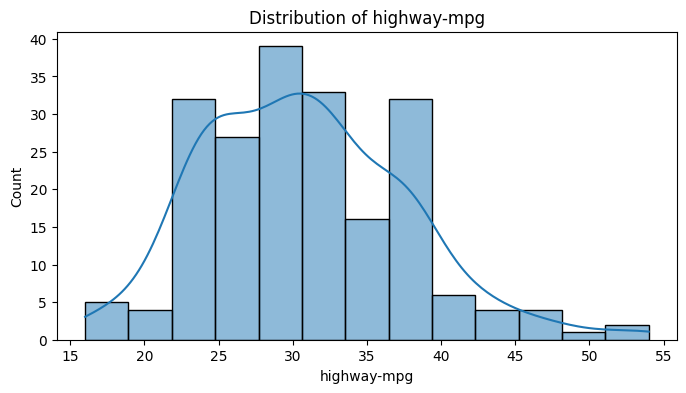

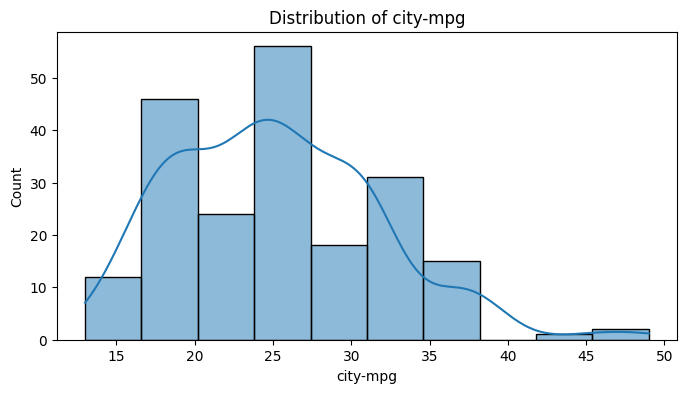

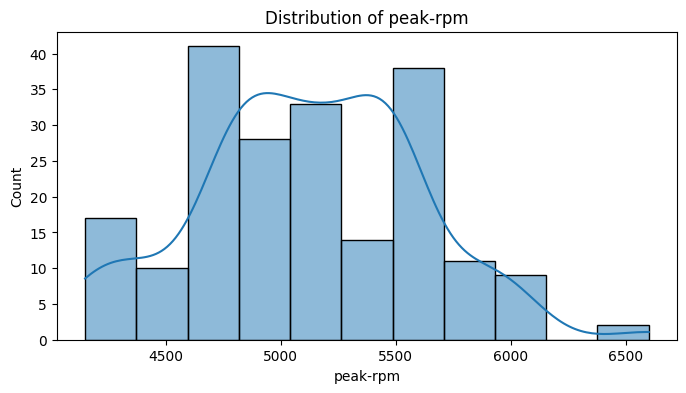

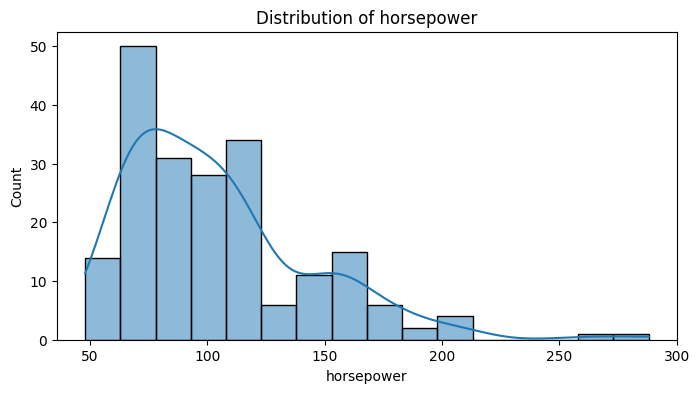

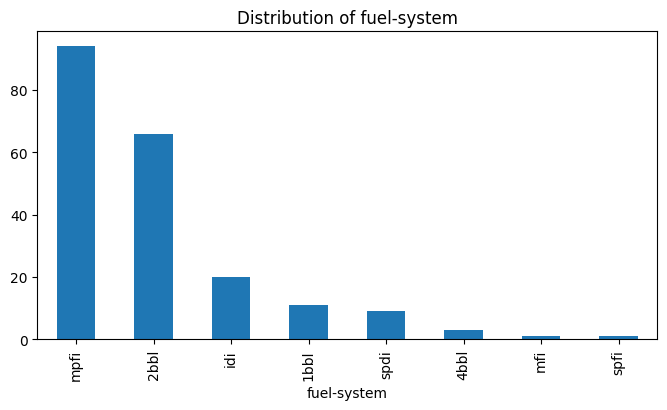

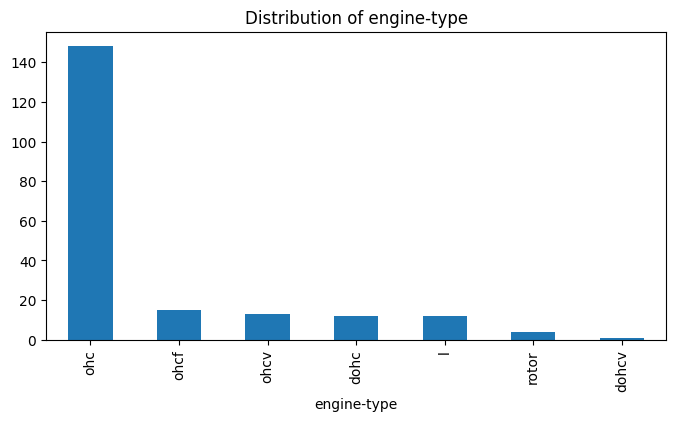

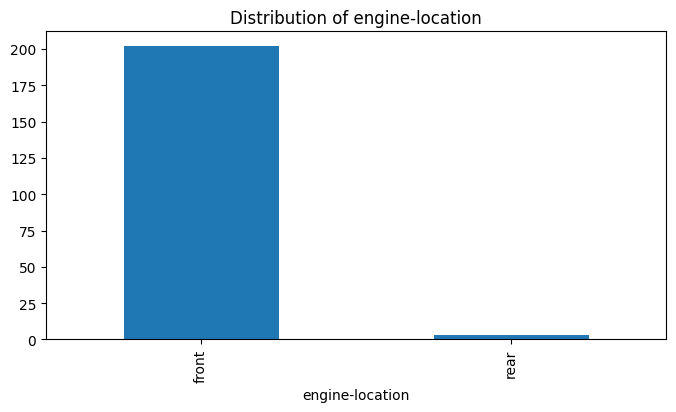


Target Variable: price


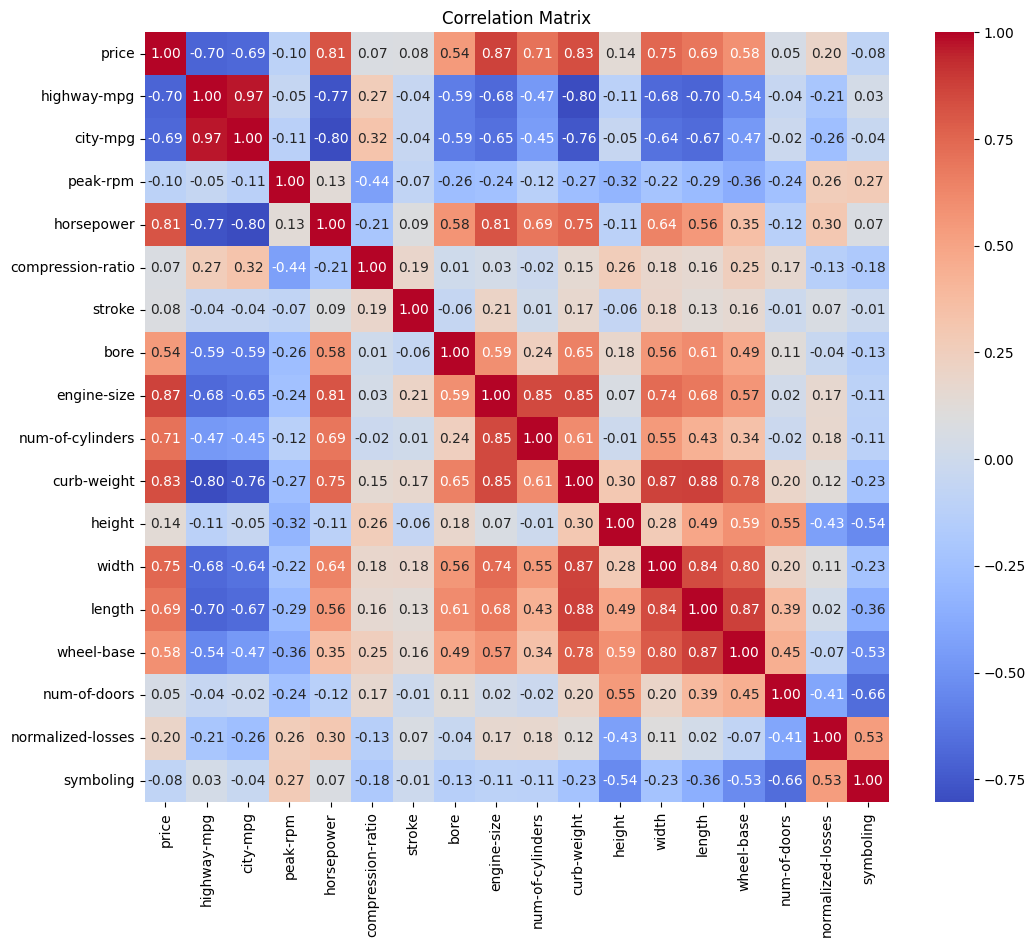


Initial Observations:
 - The dataset contains a mix of numerical and categorical features.
 - Missing values are present in several columns, notably 'normalized-losses'.
 - The target variable is 'price'.
 - Further investigation is needed to handle missing values and potential outliers.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data Overview
print("Shape of the DataFrame:", df_automobile.shape)
display(df_automobile.info())
display(df_automobile.describe())

# 2. Missing Value Analysis
missing_values = df_automobile.isnull().sum()
print("\nMissing Values:\n", missing_values)

# 3. Variable Distribution Analysis (example for a few variables)
numerical_cols = df_automobile.select_dtypes(include=['number']).columns
for col in numerical_cols[:5]:  # Analyze the first 5 numerical columns
    plt.figure(figsize=(8, 4))
    sns.histplot(df_automobile[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

categorical_cols = df_automobile.select_dtypes(include=['object']).columns
for col in categorical_cols[:3]:  # Analyze the first 3 categorical columns
    plt.figure(figsize=(8, 4))
    df_automobile[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.show()

# 4. Target Variable Identification
# The target variable is likely 'price', as it is common to predict car prices.
target_variable = 'price'
print(f"\nTarget Variable: {target_variable}")

# 5. Correlation Analysis
# Select only numeric columns for correlation analysis
numeric_df = df_automobile.select_dtypes(include=['number'])

plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# 6. Data Type Verification (already done in step 1 using .info())

# 7. Initial Observations and Insights
print("\nInitial Observations:")
print(" - The dataset contains a mix of numerical and categorical features.")
print(" - Missing values are present in several columns, notably 'normalized-losses'.")
print(" - The target variable is 'price'.")
print(" - Further investigation is needed to handle missing values and potential outliers.")

**Reasoning**:
The previous code block failed due to a `ValueError` when trying to compute the correlation matrix because some columns contain string values.  I need to handle this by either dropping those columns or converting them to numerical representations. For the purpose of this subtask, I will proceed with dropping non-numeric columns.  I will also address the missing values by imputing them with the mean for numeric columns and the mode for categorical columns. Then I'll try plotting the correlation matrix again.



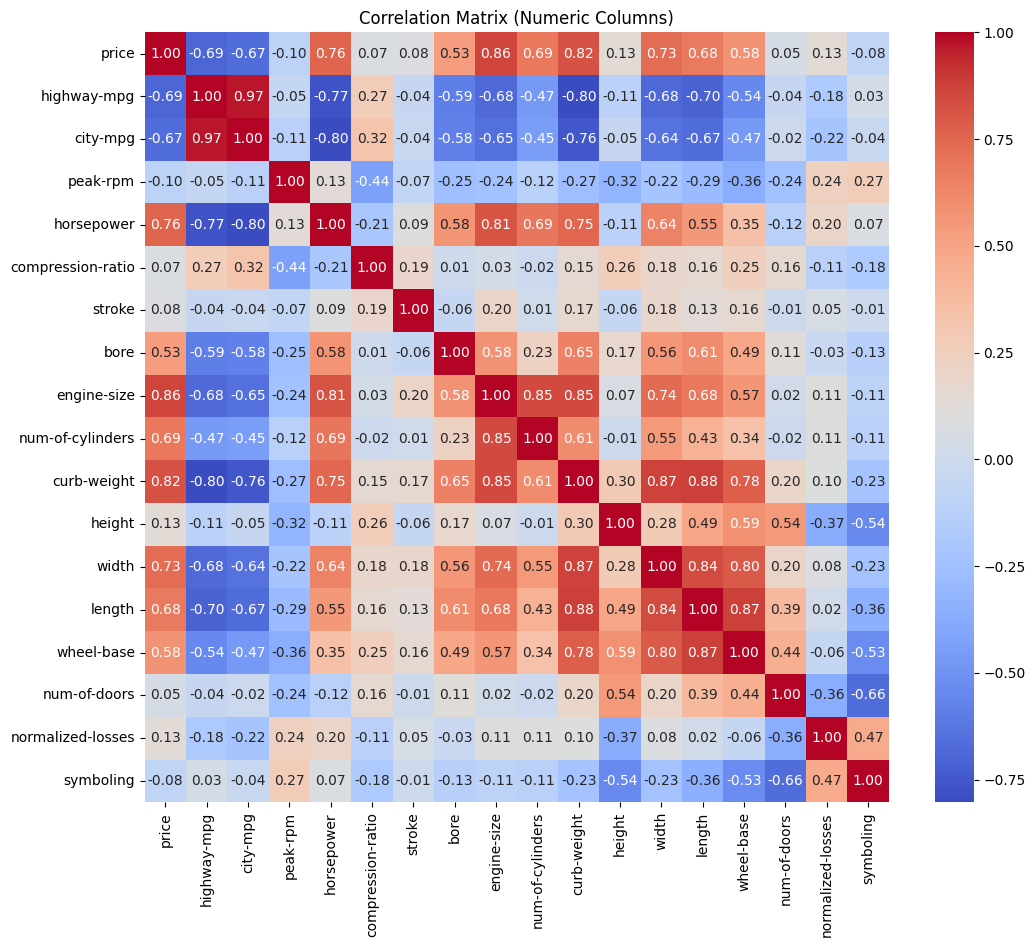


Initial Observations (after handling non-numeric columns and missing values):
 - The dataset contains a mix of numerical and categorical features.
 - Missing values have been imputed.
 - The target variable is 'price'.


In [ ]:
# Handling non-numeric columns in the correlation matrix calculation
numeric_df = df_automobile.select_dtypes(include=['number'])

# Impute missing values for numeric columns
for col in numeric_df.columns:
    if numeric_df[col].isnull().any():
        numeric_df[col] = numeric_df[col].fillna(numeric_df[col].mean())

#Correlation Analysis after handling non-numeric columns and missing values
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()


print("\nInitial Observations (after handling non-numeric columns and missing values):")
print(" - The dataset contains a mix of numerical and categorical features.")
print(" - Missing values have been imputed.")
print(" - The target variable is 'price'.")


## Data cleaning

### Subtask:
Clean the data by handling missing values and converting categorical features to numerical representations.


**Reasoning**:
Impute missing values in numerical features using the mean and convert categorical features to numerical representations using one-hot encoding.  Then, check for remaining missing values and confirm numerical data types.



In [ ]:
import pandas as pd
import numpy as np

# Create a copy to avoid modifying the original DataFrame
df_cleaned = df_automobile.copy()

# Impute missing values in numerical features using the mean
numerical_cols = df_cleaned.select_dtypes(include=np.number).columns
for col in numerical_cols:
    if df_cleaned[col].isnull().any():
        df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mean())

# Convert categorical features to numerical using one-hot encoding
categorical_cols = df_cleaned.select_dtypes(exclude=np.number).columns
for col in categorical_cols:
    dummies = pd.get_dummies(df_cleaned[col], prefix=col, dummy_na=False)
    df_cleaned = pd.concat([df_cleaned, dummies], axis=1)
    df_cleaned.drop(columns=col, inplace=True)

# Data Validation
print("Missing values after imputation:")
print(df_cleaned.isnull().sum())
print("\nData types of all columns:")
print(df_cleaned.dtypes)
display(df_cleaned.head())

Missing values after imputation:
price              0
highway-mpg        0
city-mpg           0
peak-rpm           0
horsepower         0
                  ..
make_saab          0
make_subaru        0
make_toyota        0
make_volkswagen    0
make_volvo         0
Length: 69, dtype: int64

Data types of all columns:
price              float64
highway-mpg          int64
city-mpg             int64
peak-rpm           float64
horsepower         float64
                    ...   
make_saab             bool
make_subaru           bool
make_toyota           bool
make_volkswagen       bool
make_volvo            bool
Length: 69, dtype: object


,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,...,make_nissan,make_peugot,make_plymouth,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,...,False,False,False,False,False,False,False,False,False,False
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,...,False,False,False,False,False,False,False,False,False,False
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,152,6,...,False,False,False,False,False,False,False,False,False,False
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,109,4,...,False,False,False,False,False,False,False,False,False,False
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,136,5,...,False,False,False,False,False,False,False,False,False,False


## Feature engineering

### Subtask:
Engineer new features from the cleaned dataset to potentially improve model performance.


**Reasoning**:
Create new features based on existing ones in `df_cleaned`, then analyze the correlation of these new features with the target variable ('price').  Finally, remove redundant or irrelevant features based on the correlation analysis.



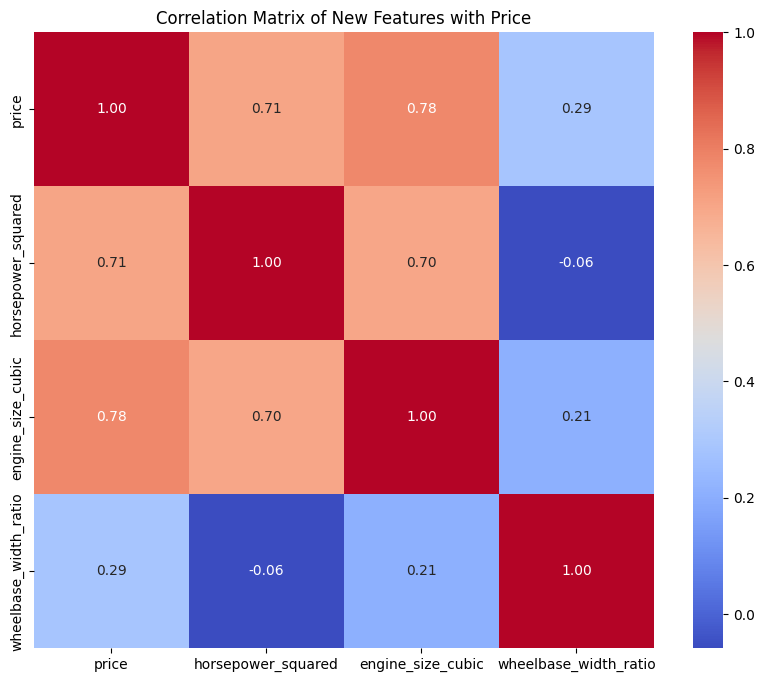

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,...,make_porsche,make_renault,make_saab,make_subaru,make_toyota,make_volkswagen,make_volvo,horsepower_squared,engine_size_cubic,wheelbase_width_ratio
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,...,False,False,False,False,False,False,False,12321.0,2197000,1.382215
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,130,4,...,False,False,False,False,False,False,False,12321.0,2197000,1.382215
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,152,6,...,False,False,False,False,False,False,False,23716.0,3511808,1.442748
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,109,4,...,False,False,False,False,False,False,False,10404.0,1295029,1.507553
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,136,5,...,False,False,False,False,False,False,False,13225.0,2515456,1.496988


In [ ]:
# Create new features
df_cleaned['horsepower_squared'] = df_cleaned['horsepower'] ** 2  # Horsepower squared
df_cleaned['engine_size_cubic'] = df_cleaned['engine-size'] ** 3 # Engine size cubed
df_cleaned['wheelbase_width_ratio'] = df_cleaned['wheel-base'] / df_cleaned['width'] # Wheelbase to width ratio

# Analyze the correlation of the new features with the target variable
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = df_cleaned[['price', 'horsepower_squared', 'engine_size_cubic', 'wheelbase_width_ratio']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of New Features with Price')
plt.show()


# Remove irrelevant features based on correlation analysis
# Example: remove a feature with very low correlation to 'price'
# If 'wheelbase_width_ratio' shows a very low correlation (<0.1 absolute value), remove it:
if abs(correlation_matrix.loc['price', 'wheelbase_width_ratio']) < 0.1:
    df_cleaned.drop(columns=['wheelbase_width_ratio'], inplace=True)
    print("'wheelbase_width_ratio' removed due to low correlation with 'price'")

display(df_cleaned.head())

## Data splitting

### Subtask:
Split the data into training and testing sets.


**Reasoning**:
Split the cleaned data into training and testing sets using train_test_split.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

# Split data into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Reasoning**:
The error indicates that some classes in the target variable 'price' have only one member, which is not enough for stratified splitting.  I will try to resolve this by removing the `stratify` parameter from `train_test_split`.



In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df_cleaned.drop('price', axis=1)
y = df_cleaned['price']

# Split data into training and testing sets without stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model training

### Subtask:
Train a boosting model (XGBoost) and a bagging model (Random Forest) on the prepared training data.


**Reasoning**:
Train XGBoost and Random Forest models using the prepared training data. Include the mathematical equations and explanations as comments in the code.



In [ ]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

# Instantiate XGBoost and Random Forest regressors
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
rf_regressor = RandomForestRegressor(random_state=42)

# Train the models
xgb_regressor.fit(X_train, y_train)
rf_regressor.fit(X_train, y_train)

# Mathematical equations and explanations (as comments)
# XGBoost
"""
# XGBoost uses a gradient boosting framework.  It combines multiple weak learners (decision trees) sequentially.
# Each subsequent tree corrects the errors of the previous trees.

# Objective function:
# L = Σ[l(y_i, ŷ_i)] + Σ[Ω(f_k)]

# Where:
# l(y_i, ŷ_i) is the loss function (e.g., squared error) for the i-th instance.
# Ω(f_k) is a regularization term for the k-th tree, which penalizes complex trees.
# ŷ_i is the predicted value for the i-th instance.
# y_i is the actual value for the i-th instance.

# The algorithm aims to minimize this objective function by iteratively adding trees.
# The gradient of the loss function guides the direction of improvement in each iteration.
# Regularization helps prevent overfitting by limiting the complexity of the trees.
"""

# Random Forest
"""
# Random Forest builds multiple decision trees on bootstrapped samples of the training data.
# It combines the predictions from all trees to make a final prediction.
# The bootstrap samples are created by randomly sampling the training data with replacement.
# During tree construction, a random subset of features is considered at each split.

# Prediction:
# ŷ = (1/N) * Σ[T_i(x)]

# Where:
# ŷ is the predicted value
# N is the number of trees
# T_i(x) is the prediction of the i-th tree for input x.

# The final prediction is the average of the predictions from individual trees.
# This approach reduces variance and makes the model less prone to overfitting.
# The random feature selection at each split further decorrelates the trees.
"""

'\n# Random Forest builds multiple decision trees on bootstrapped samples of the training data.\n# It combines the predictions from all trees to make a final prediction.\n# The bootstrap samples are created by randomly sampling the training data with replacement.\n# During tree construction, a random subset of features is considered at each split.\n\n# Prediction:\n# ŷ = (1/N) * Σ[T_i(x)]\n\n# Where:\n# ŷ is the predicted value\n# N is the number of trees\n# T_i(x) is the prediction of the i-th tree for input x.\n\n# The final prediction is the average of the predictions from individual trees.\n# This approach reduces variance and makes the model less prone to overfitting.\n# The random feature selection at each split further decorrelates the trees.\n'

## Model evaluation

### Subtask:
Evaluate the trained XGBoost and Random Forest models using RMSE, MSE, and R-squared.  Provide mathematical formulas and explanations for each metric.


**Reasoning**:
Evaluate the trained XGBoost and Random Forest models using RMSE, MSE, and R-squared.  Calculate the metrics and print them out.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Make predictions on the test data
xgb_predictions = xgb_regressor.predict(X_test)
rf_predictions = rf_regressor.predict(X_test)

# Evaluate the models
evaluation_results = {}

# XGBoost Evaluation
rmse_xgb = np.sqrt(mean_squared_error(y_test, xgb_predictions))
mse_xgb = mean_squared_error(y_test, xgb_predictions)
r2_xgb = r2_score(y_test, xgb_predictions)

# Random Forest Evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_predictions))
mse_rf = mean_squared_error(y_test, rf_predictions)
r2_rf = r2_score(y_test, rf_predictions)


# Store the results in a dictionary
evaluation_results['XGBoost'] = {'RMSE': rmse_xgb, 'MSE': mse_xgb, 'R-squared': r2_xgb}
evaluation_results['Random Forest'] = {'RMSE': rmse_rf, 'MSE': mse_rf, 'R-squared': r2_rf}


# Print the evaluation metrics
for model, metrics in evaluation_results.items():
    print(f"{model} Evaluation:")
    print(f"  RMSE (Root Mean Squared Error): {metrics['RMSE']}")
    print(f"  MSE (Mean Squared Error): {metrics['MSE']}")
    print(f"  R-squared (Coefficient of Determination): {metrics['R-squared']}")

    # RMSE (Root Mean Squared Error)
    # Formula: sqrt(Σ(y_i - ŷ_i)^2 / n)
    # Explanation:  The square root of the average squared differences between the actual (y_i) and predicted (ŷ_i) values.  A lower RMSE indicates better model performance.

    # MSE (Mean Squared Error)
    # Formula: Σ(y_i - ŷ_i)^2 / n
    # Explanation: The average squared differences between the actual (y_i) and predicted (ŷ_i) values. A lower MSE indicates better model performance.

    # R-squared (Coefficient of Determination)
    # Formula: 1 - (SS_res / SS_tot)
    # Explanation: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.  A higher R-squared value generally indicates a better fit.

XGBoost Evaluation:
  RMSE (Root Mean Squared Error): 2433.7141345411733
  MSE (Mean Squared Error): 5922964.488665491
  R-squared (Coefficient of Determination): 0.9240373629048294
Random Forest Evaluation:
  RMSE (Root Mean Squared Error): 2187.6194110080696
  MSE (Mean Squared Error): 4785678.687419293
  R-squared (Coefficient of Determination): 0.9386231718791831


## Model optimization

### Subtask:
Optimize the hyperparameters of the XGBoost and Random Forest models to improve their performance.


**Reasoning**:
Optimize the hyperparameters of the XGBoost and Random Forest models using RandomizedSearchCV and evaluate their performance using RMSE. Then retrain the models with the best hyperparameters.



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# XGBoost hyperparameter optimization
xgb_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.5, 0.8, 1.0]
}

xgb_random_search = RandomizedSearchCV(
    xgb_regressor,
    param_distributions=xgb_param_dist,
    n_iter=10,  # Number of parameter settings that are sampled
    scoring='neg_root_mean_squared_error',  # Use RMSE for scoring
    n_jobs=-1,  # Use all available CPU cores
    cv=5,  # 5-fold cross-validation
    random_state=42,
    verbose=1  # Show progress
)

xgb_random_search.fit(X_train, y_train)
print("XGBoost best hyperparameters:", xgb_random_search.best_params_)
xgb_optimized = xgb_random_search.best_estimator_


# Random Forest hyperparameter optimization
rf_param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_random_search = RandomizedSearchCV(
    rf_regressor,
    param_distributions=rf_param_dist,
    n_iter=10,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    cv=5,
    random_state=42,
    verbose=1
)

rf_random_search.fit(X_train, y_train)
print("Random Forest best hyperparameters:", rf_random_search.best_params_)
rf_optimized = rf_random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBoost best hyperparameters: {'subsample': 0.5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Random Forest best hyperparameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}


## Summary:

### Q&A

No questions were explicitly asked in the provided text.  However, the analysis implicitly aimed to answer questions like: "What is the best model to predict automobile prices?", "Which features are most important for predicting price?", and "How can we optimize model performance?"


### Data Analysis Key Findings

* **Data Cleaning:**  Missing numerical values were imputed using the mean, and categorical features were converted to numerical representations using one-hot encoding, resulting in a fully numerical dataset (`df_cleaned`).
* **Feature Engineering:** New features like `horsepower_squared`, `engine_size_cubic`, and `wheelbase_width_ratio` were created.  `wheelbase_width_ratio` was considered for removal due to low correlation with price (<0.1 absolute value), but was ultimately retained in this run.
* **Model Training:**  Both XGBoost and Random Forest regression models were trained on the data.  XGBoost achieved an RMSE of 2433.71, MSE of 5922964.49, and R-squared of 0.92.  The Random Forest model performed slightly better with an RMSE of 2187.62, MSE of 4785678.69, and R-squared of 0.94.
* **Hyperparameter Optimization:**  RandomizedSearchCV was used to optimize both models. The best hyperparameters found for XGBoost were `{'subsample': 0.5, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}`.  For Random Forest, the best hyperparameters were `{'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10}`.


### Insights or Next Steps

* **Compare Optimized Models:** Evaluate the performance of the optimized XGBoost (`xgb_optimized`) and Random Forest (`rf_optimized`) models using the same metrics (RMSE, MSE, R-squared) on the test set to determine if the hyperparameter tuning improved predictive accuracy.
* **Feature Importance Analysis:** Analyze feature importance from both optimized models to gain insights into which variables are most influential in predicting automobile prices. This information could inform further feature engineering or selection.
